# Fig 12. Number of research projects and total funding received during the period

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.ticker as ticker

plt.style.use('seaborn-muted')


def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.fillna(0)
    
    
    return filtered_df

#### Define projects data path

In [2]:
file_path = "data/mapeo_proyectos.csv"

#### Define function to clean projects data

In [3]:
def prepare_data(data):
    data.drop_duplicates(subset ="ID proyecto", keep = "first", inplace = True)
    data["Financiación"] = pd.to_numeric(data["Financiación"], errors='coerce')
    mini = data[["ID proyecto","Financiación", "Temporalización (inicio)"]] 
    # mini = mini.groupby(['ID proyecto','Temporalización (inicio)'])["Financiación"].apply(list).reset_index(name='Financiación')
    # new_fins = [fin[0] for fin in mini["Financiación"]]
    # mini["Financiación"] = new_fins
    mini = mini.loc[mini['Temporalización (inicio)'] != 0]
    grp = mini.groupby(pd.cut(mini["Temporalización (inicio)"], np.arange(mini['Temporalización (inicio)'].min()-1, 1+mini['Temporalización (inicio)'].max(), 1)))
    grouped = mini.groupby("Temporalización (inicio)", as_index=False)
    df2 = grp.agg({'Financiación':['sum', 'median', 'count']})
    df2.reset_index(level=[0], inplace=True)
    df2.columns = df2.columns.droplevel(1)
    df2.columns = ["inicio", "sum", "median", "count"]
    df2["inicio"] = df2.inicio.apply(lambda x: int(x.right))
    # df2 = df2.drop(0)
    # df2.set_index("inicio")

    # df2['inicio'] = pd.to_numeric(df2['inicio'], downcast='signed', errors='coerce')
    # df2 = df2.fillna(0)
    # df2.astype({'inicio': 'int32'}).dtypes
    # df2
    # df_faltan = pd.DataFrame([[1994, 0, 0,0],[1997, 0, 0,0],[2001, 0, 0,0],[2002, 0, 0,0]], columns=['inicio','sum','median','count'])
    # df2 = df2.append(df_faltan, ignore_index=True)
    # df2 = df2.sort_values(by=['inicio'])
    # df2 = df2.reset_index(drop=True)
    return df2

#### Run program

In [4]:
proyectos = read_csv(file_path)
df2 = prepare_data(proyectos)

#### Print graph

<Figure size 432x288 with 0 Axes>

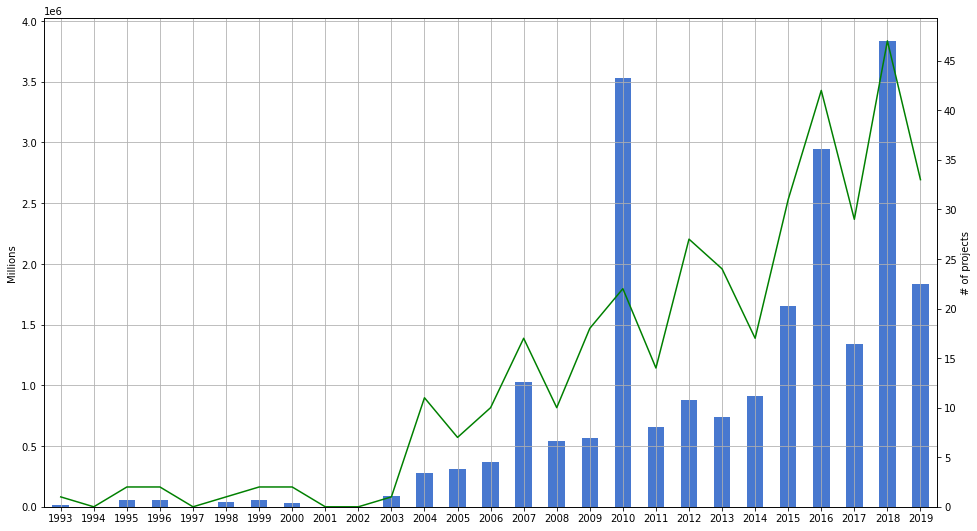

In [5]:
plt.figure()
ax1 = df2[['inicio', 'sum']].plot(x='inicio', kind="bar", figsize=(16,9), legend=False)
# df2.plot(x="inicio", y="sum", kind="bar")
ax1.set_ylabel("Millions")
ax1.set_xlabel("")

ax2 = df2['count'].plot(secondary_y=True, color='g')
ax2.set_ylabel('# of projects')
ax2.set_ylim(bottom=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(base=5) )
ax1.grid(axis="both")
# plt.title("Number of research projects and total funding across the whole analysed period (1993-2019)",fontsize=20,fontweight="bold")
plt.show()

#### Data table

In [6]:
df2

,inicio,sum,median,count
0,1993,16828.0,16828.0,1
1,1994,0.0,NaN,0
2,1995,55952.0,27976.0,2
3,1996,57397.0,28698.5,2
4,1997,0.0,NaN,0
5,1998,40238.0,40238.0,1
6,1999,55894.0,27947.0,2
7,2000,30050.0,15025.0,2
8,2001,0.0,NaN,0
9,2002,0.0,NaN,0
